In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역3\\구역3_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역3\\구역3_충전소.csv',
                     encoding='utf-8')

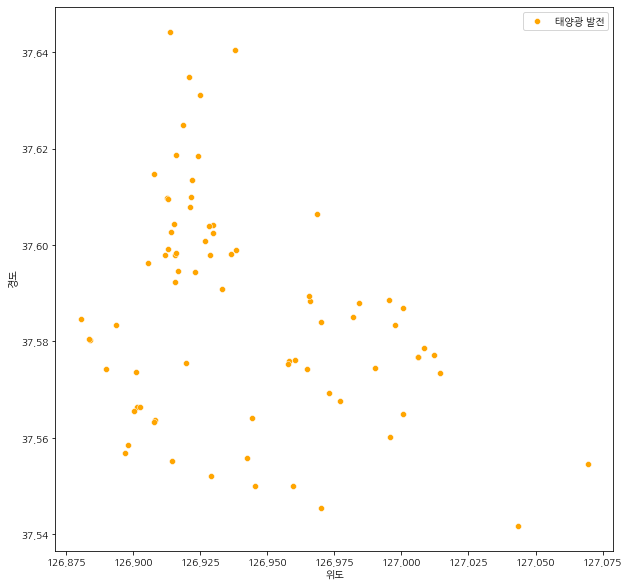

In [2]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

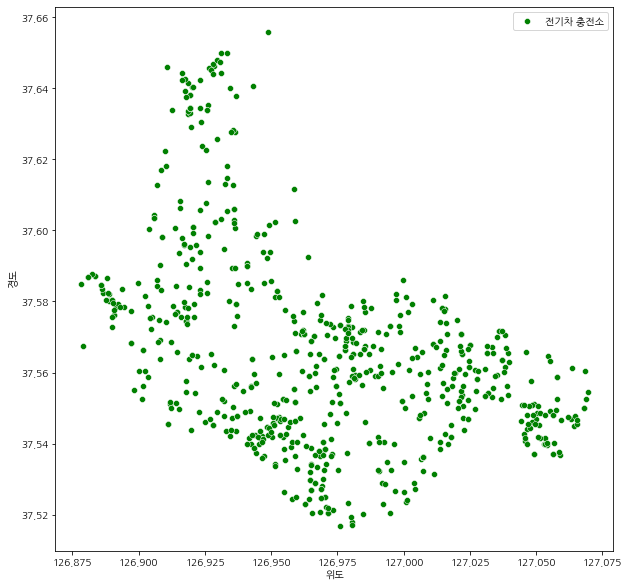

In [3]:
fig = plt.figure(figsize=(10,10))
#sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

In [22]:
import scipy as sp
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

charger_clu = charger[['y','x']]
model_ch = KMeans(n_clusters = 3, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

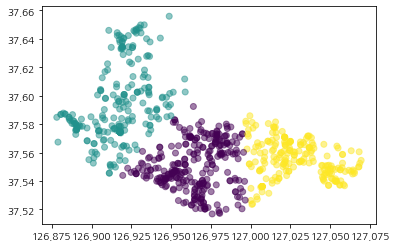

In [23]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [24]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 2, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

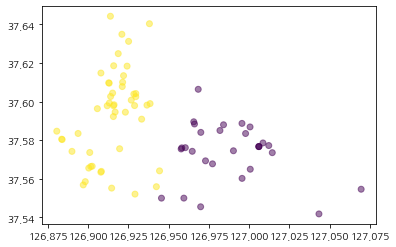

In [25]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

# elbow 기법

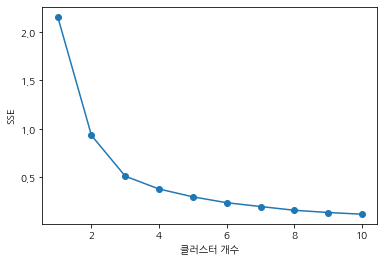

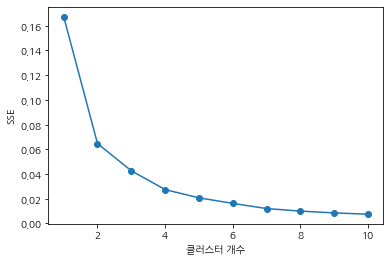

In [19]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++',random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow(charger_clu)
elbow(solar_clu)

# Silhouette 기법

In [21]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(solar_clu)
    clusters = kmeans.predict(solar_clu)
    
    score = silhouette_score(solar_clu, clusters)
    print('k: ',k,'score: ',score)
    
    if score>best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n: ',best_n, 'best score: ',best_silhouette_score)

k:  2 score:  0.544008588988986
k:  3 score:  0.5176172033253712
k:  4 score:  0.5105613382909016
k:  5 score:  0.5251217814522561
k:  6 score:  0.4868164509768802
k:  7 score:  0.5020463427504526
k:  8 score:  0.5014595927351595
k:  9 score:  0.47509054500167663
k:  10 score:  0.4576556323774021
k:  11 score:  0.4564893258244078
k:  12 score:  0.4533315503645788
k:  13 score:  0.4435287103855583
k:  14 score:  0.4376941886826249
k:  15 score:  0.42966163845559596
k:  16 score:  0.47337118439892917
k:  17 score:  0.4951819944259429
k:  18 score:  0.48471047675369233
k:  19 score:  0.4943159155424944
k:  20 score:  0.4346747775819786
k:  21 score:  0.4712414818489563
k:  22 score:  0.4802181213078332
k:  23 score:  0.4240640039352777
k:  24 score:  0.47189368761919287
k:  25 score:  0.45953335547368157
k:  26 score:  0.4480066595804742
k:  27 score:  0.45478832675267655
k:  28 score:  0.45125718391628805
k:  29 score:  0.4558250270409572
best n:  2 best score:  0.544008588988986


(array([126.9 , 126.92, 126.94, 126.96, 126.98, 127.  , 127.02, 127.04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

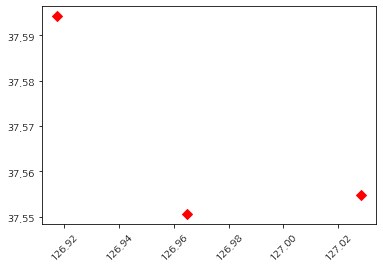

In [26]:
#충전소 centroid
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([126.91, 126.92, 126.93, 126.94, 126.95, 126.96, 126.97, 126.98,
        126.99, 127.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

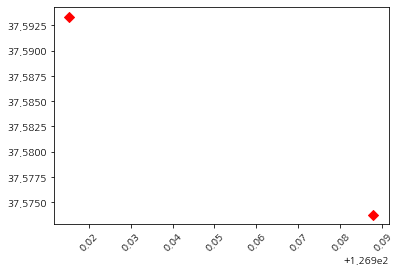

In [27]:
#태양광
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

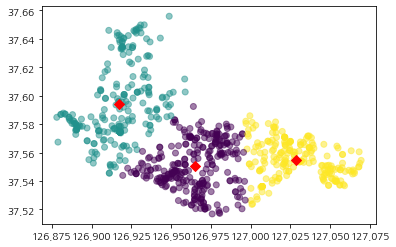

In [28]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

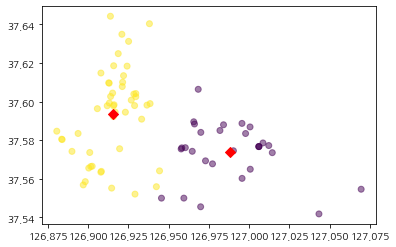

In [29]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

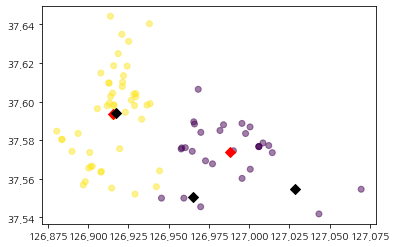

In [30]:
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.scatter(center_x,center_y,s=50,marker='D',c='black')

중점:37.57503143916918, 126.96092420779163


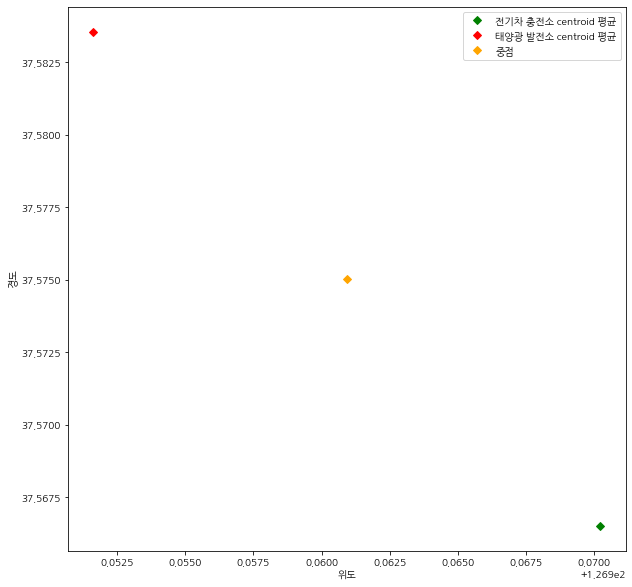

In [31]:
center_x_list = center_x.tolist()
center_y_list = center_y.tolist()

center_x_solar_list = center_x_solar.tolist()
center_y_solar_list = center_y_solar.tolist()


center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()
#종로구

In [32]:
#은평구 37.6027 126.9291
#서대문구 37.5791 126.9368
#마포구 37.5638 126.9084
#종로구 37.5730 126.9794
#중구 37.5641 126.9979
#용산구 37.5384 126.9654
#성동구 37.5633 127.0371

area = []

ep_y = 37.6027 
ep_x = 126.9291
ep = []
ep.append(ep_y)
ep.append(ep_x)
area.append(ep)

sdm_y = 37.5791
sdm_x = 126.9368
sdm = []
sdm.append(sdm_y)
sdm.append(sdm_x)
area.append(sdm)

mp_y = 37.5638
mp_x = 126.9084
mp = []
mp.append(mp_y)
mp.append(mp_x)
area.append(mp)

jr_y = 37.5730
jr_x = 126.9794
jr = []
jr.append(jr_y)
jr.append(jr_x)
area.append(jr)

j_y = 37.5641
j_x = 126.9979
j = []
j.append(j_y)
j.append(j_x)
area.append(j)

ys_y = 37.5384
ys_x = 126.9654
ys = []
ys.append(ys_y)
ys.append(ys_x)
area.append(ys)

sd_y = 37.5633
sd_x = 127.0371
sd = []
sd.append(sd_y)
sd.append(sd_x)
area.append(sd)

area

[[37.6027, 126.9291],
 [37.5791, 126.9368],
 [37.5638, 126.9084],
 [37.573, 126.9794],
 [37.5641, 126.9979],
 [37.5384, 126.9654],
 [37.5633, 127.0371]]

In [33]:
import math

line = []

for i in range(len(area)):
    dist = math.sqrt((c_y_s-area[i][0])**2+(c_x_s-area[i][1])**2)
    line.append(dist)
line

[0.029552254298017243,
 0.015465318308869052,
 0.047511193018732,
 0.029725766644839342,
 0.05021090168747812,
 0.04721149533059697,
 0.08785579831582073]

In [34]:
print("태양광 최적입지 좌표:{}, {}".format(c_y_s, c_x_s))
print("은평구에서의 거리: {}".format(line[0]))
print("서대문구에서의 거리: {}".format(line[1]))
print("마포구에서의 거리: {}".format(line[2]))
print("종로구에서의 거리: {}".format(line[3]))
print("중구에서의 거리: {}".format(line[4]))
print("용산구에서의 거리: {}".format(line[5]))
print("성동구에서의 거리: {}".format(line[6]))

태양광 최적입지 좌표:37.58355277486629, 126.9516104309993
은평구에서의 거리: 0.029552254298017243
서대문구에서의 거리: 0.015465318308869052
마포구에서의 거리: 0.047511193018732
종로구에서의 거리: 0.029725766644839342
중구에서의 거리: 0.05021090168747812
용산구에서의 거리: 0.04721149533059697
성동구에서의 거리: 0.08785579831582073
